In [41]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import norm

In [92]:
# correlation coefficient
rho = - 0.7
# size 
N = 20000
# parameters of the normal increments
mu = np.array([0,0])
cov = np.array([[1, rho] , [rho , 1]])

# generate correlated increments
W = np.random.multivariate_normal(mu, cov, size=N-1)
# array of increments
z_1 = W.T[0]
z_2 = W.T[1]

correlation matrix :
 [[ 1.         -0.70415361]
 [-0.70415361  1.        ]]

theoretical correlation coefficient = -0.7


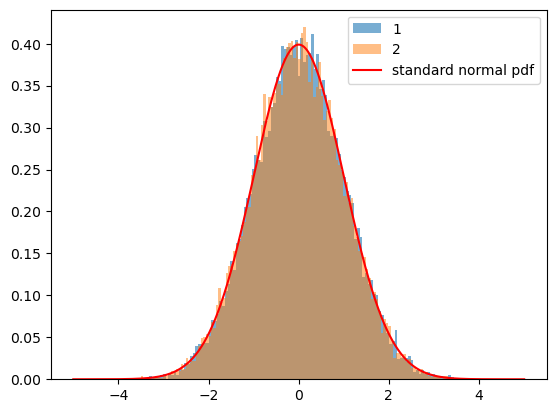

In [93]:
# check of the correlation between increments
print(f'correlation matrix :\n {np.corrcoef(z_1, z_2)}')
print(f'\ntheoretical correlation coefficient = {rho}')
plt.figure(1)
# histograms
plt.hist(z_1, bins=int(np.sqrt(N-1)), label='1', alpha=0.6, density=True)
plt.hist(z_2, bins=int(np.sqrt(N-1)), label='2', alpha=0.5, density=True)
# plot of the benchmark pdf
x = x = np.linspace(-5, 5, 1000)
plt.plot(x, norm.pdf(x, 0, 1), label='standard normal pdf', c='r')

plt.legend()
plt.show()

In [38]:
def wiener_path(z):
    # z array of increments
    n = len(z) + 1
    w = np.zeros(n)
    w[0] = 0
    w[1:] = np.cumsum(z)
    return w

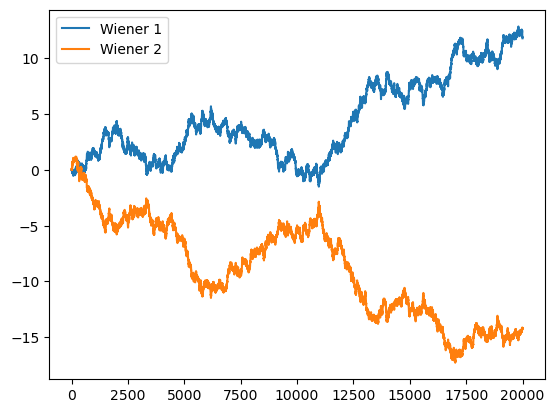

In [94]:
# time interval
h = 1/256
# generation of Wiener paths
w_1 = wiener_path(z_1 * np.sqrt(h))
w_2 = wiener_path(z_2 * np.sqrt(h))

plt.plot(w_1, label='Wiener 1')
plt.plot(w_2, label='Wiener 2')

plt.legend()
plt.show()

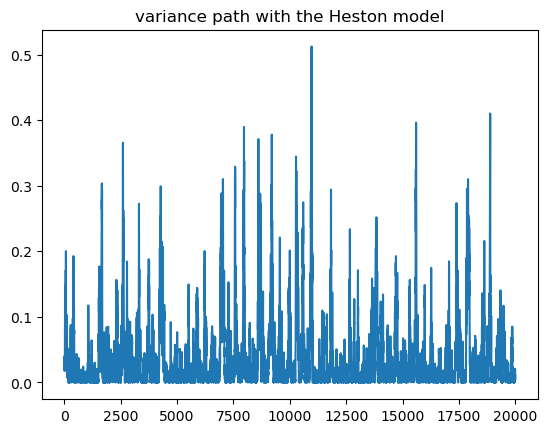

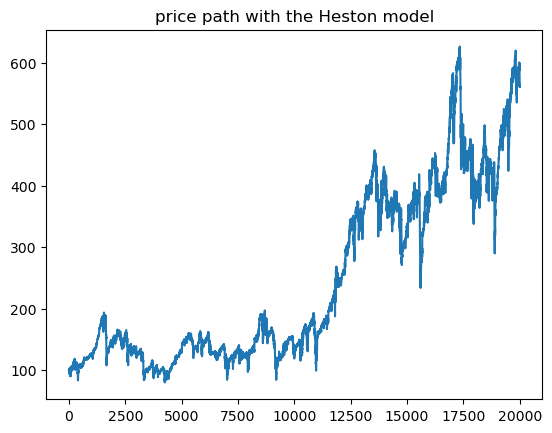

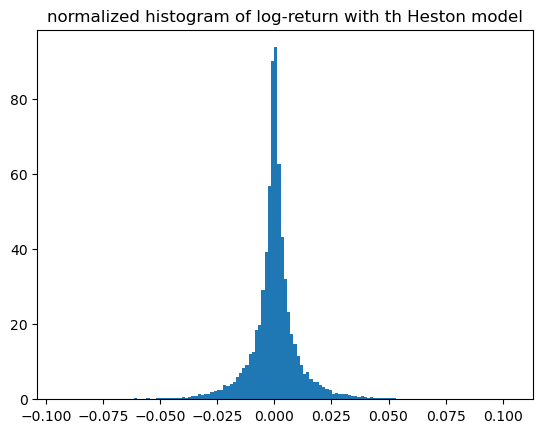

In [108]:
# heston model parameters for the variance
lam = 3
v_bar = 0.02
eta = 0.9
v_0 = 0.02
# heston model parameters for the price
s_0 = 100
r = 0.02

# variance and price paths (Euler-Maruyama scheme)
v = np.zeros(N)
v[0] = v_0

s = np.zeros(N)
s[0] = s_0

for i in range(1, N):
    # variance path
    dv = (-lam)*(v[i-1] - v_bar)*h + eta*np.sqrt(v[i-1])*np.sqrt(h)*z_2[i-1]
    
    # reflecting condition on the variance
    if v[i-1] + dv < 0:
        v[i] = -(v[i-1] + dv)
    else:
        v[i] = v[i-1] + dv
    
    # price path
    ds = r*s[i-1]*h + np.sqrt(v[i-1])*s[i-1]*np.sqrt(h)*z_1[i-1]
    s[i] = s[i-1] + ds
    
log_returns = np.log(s[1:] / s[:-1])

# plot variance path
plt.figure(1)
plt.title('variance path with the Heston model')
plt.plot(v)

# plot price path
plt.figure(2)
plt.title('price path with the Heston model')
plt.plot(s)

# histogram of log-returns
plt.figure(3)
n_bins = int(np.sqrt(len(log_returns)))
plt.title('normalized histogram of log-return with th Heston model')
plt.hist(log_returns, bins=n_bins, density=True)

plt.show()

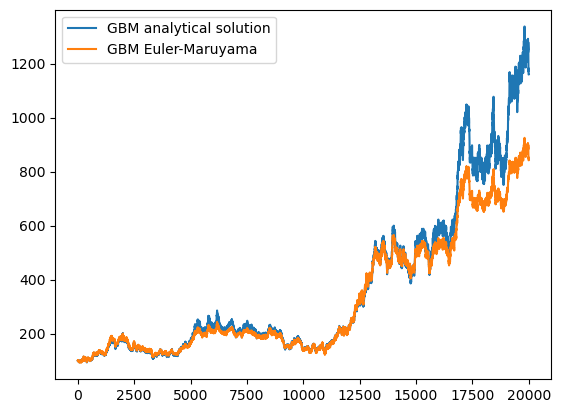

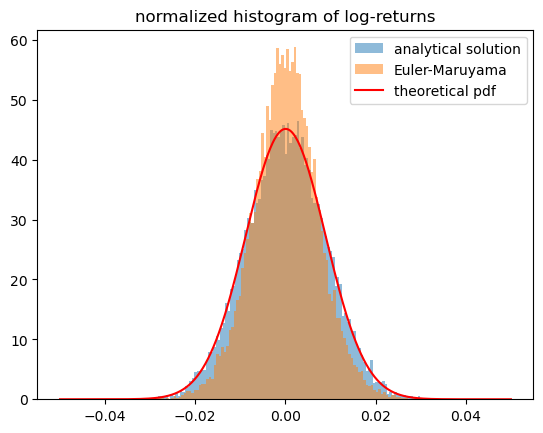

In [162]:
# the path price for GBM is generated by using the same Wiener path as for Heston model

# Euler-Maruyama scheme)
sigma = np.sqrt(v_bar)

s_gbm = np.zeros(N)
s_gbm[0] = 100

for i in range(1, N):
    ds_gbm = r*s[i-1]*h + sigma*s[i-1]*np.sqrt(h)*z_1[i-1]
    s_gbm[i] = s_gbm[i-1] + ds_gbm
    
# log returns for the GBM       
log_returns_gbm = np.log(s_gbm[1:] / s_gbm[:-1])

# analytical solution
a_gbm = np.zeros(N)
a_gbm[0] = s_0
t = np.arange(1, N)*h
ww = np.cumsum(np.sqrt(h)*z_1)
a = (r - (v_bar/2))*t + sigma*ww
a_gbm[1:] = s_0 * np.exp(a)

log_returns_gbm_a = np.log(a_gbm[1:] / a_gbm[:-1])

plt.figure(1)
plt.plot(a_gbm, label='GBM analytical solution')
plt.plot(s_gbm, label='GBM Euler-Maruyama')
plt.legend()

plt.figure(2)
n_bins = int(np.sqrt(len(log_returns_gbm_a)))
plt.title('normalized histogram of log-returns')

plt.hist(log_returns_gbm_a, bins=n_bins, density=True, label='analytical solution', alpha=0.5)
plt.hist(log_returns_gbm, bins=n_bins, density=True, label='Euler-Maruyama', alpha=0.5)
# plot of the benchmark pdf
x = x = np.linspace(-0.05, 0.05, 1000)
y = norm.pdf(x, (r - (v_bar/2))*h, sigma*np.sqrt(h))
plt.plot(x, y, label='theoretical pdf', c='r')
plt.legend()

plt.show()

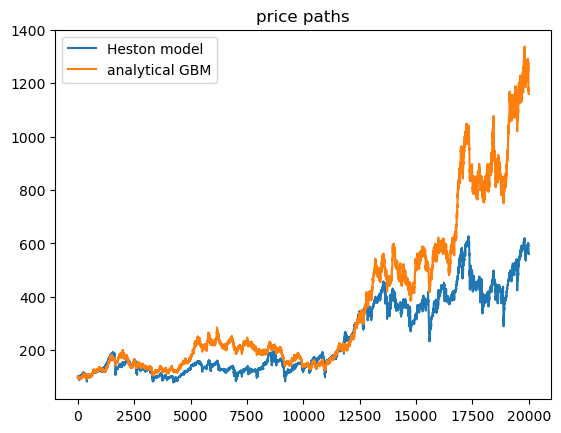

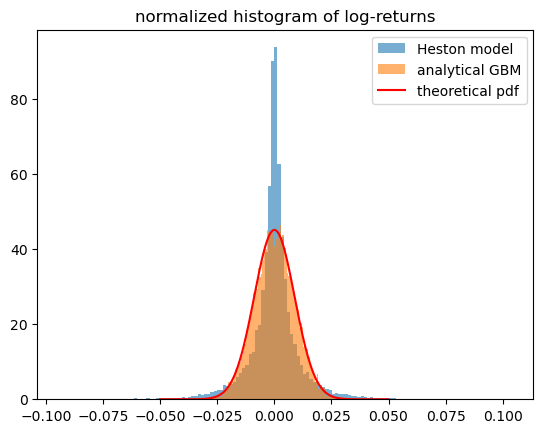

In [161]:
# plot price path
plt.figure(1)
plt.title('price paths')
plt.plot(s, label='Heston model')
plt.plot(a_gbm, label='analytical GBM')
plt.legend()

plt.figure(2)
n_bins = int(np.sqrt(len(log_returns)))
plt.title('normalized histogram of log-returns')
plt.hist(log_returns, bins=n_bins, density=True, label='Heston model', alpha=0.6)
plt.hist(log_returns_gbm_a, bins=n_bins, density=True, label='analytical GBM', alpha=0.6)
# plot of the benchmark pdf
x = x = np.linspace(-0.05, 0.05, 1000)
y = norm.pdf(x, (r - (v_bar/2))*h, sigma*np.sqrt(h))
plt.plot(x, y, label='theoretical pdf', c='r')
plt.legend()

plt.show()